In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd


In [8]:
#reading data

file = input("File you want to read:")
data1 = pd.read_csv(file + '.csv', header=None)

x = data1.iloc[:,0]
y = data1.iloc[:,1]
mass_ini = data1.iloc[:,2]
mass_cor = data1.iloc[:,3]
sfr_10myr = data1.iloc[:,4]
sfr_100myr = data1.iloc[:,5]
age_lightw = data1.iloc[:,6]
age_massw = data1.iloc[:,7]
met_lightw = data1.iloc[:,8]
met_massw = data1.iloc[:,9]
A_V = data1.iloc[:,10]


File you want to read:ASASSN-13cp


In [9]:
# Read the CSV file
galaxy = pd.read_csv('galaxy_global.csv', header=None)

# Get the name of the galaxies from the 0th column
galaxy_names = galaxy.iloc[:, 0]

# Check if the entered galaxy name exists in the CSV file
if file in galaxy_names.values:
    # Get the index of the row corresponding to the entered galaxy name
    galaxy_index = galaxy_names[galaxy_names == file].index[0]

    # Extract the properties corresponding to the entered galaxy name
    g_mass_ini = galaxy.iloc[galaxy_index, 1]
    g_mass_cor = galaxy.iloc[galaxy_index, 2]
    g_sfr_10myr = galaxy.iloc[galaxy_index, 3]
    g_sfr_100myr = galaxy.iloc[galaxy_index, 4]
    g_age_lightw = galaxy.iloc[galaxy_index, 5]
    g_age_massw = galaxy.iloc[galaxy_index, 6]
    g_met_lightw = galaxy.iloc[galaxy_index, 7]
    g_met_massw = galaxy.iloc[galaxy_index, 8]
    g_A_V = galaxy.iloc[galaxy_index, 9]

    # Now you have the properties corresponding to the entered galaxy name
    # You can use these variables in your code as needed
else:
    print("Galaxy not found in the CSV file.")


C:\Users\HP\AppData\Local\Temp\ipykernel_3564\1328491824.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  galaxy = pd.read_csv('galaxy_global.csv', header=None)


In [10]:
import math
import random

def is_point_inside_circle(x, y, a, b, radius):
    """
    Check if a point (x, y) lies inside a circle with a given radius and center (a, b).

    Parameters:
    x (float): x-coordinate of the point.
    y (float): y-coordinate of the point.
    a (float): x-coordinate of the center of the circle.
    b (float): y-coordinate of the center of the circle.
    radius (float): Radius of the circle.

    Returns:
    bool: True if the point is inside the circle, False otherwise.
    """
    distance_to_center = math.sqrt((x - a)**2 + (y - b)**2)
    return distance_to_center <= radius

def take_area_around_point(x, y, a, b, radius, area_size):
    """
    Take an area of the mentioned size around the point (x, y) if it lies inside the circle.

    Parameters:
    x (float): x-coordinate of the point.
    y (float): y-coordinate of the point.
    a (float): x-coordinate of the center of the circle.
    b (float): y-coordinate of the center of the circle.
    radius (float): Radius of the circle.
    area_size (float): Size of the area to take around the point.

    Returns:
    float: The area around the point if the point lies inside the circle, 0.0 otherwise.
    """
    if is_point_inside_circle(x, y, a, b, radius):
        return area_size * area_size
    else:
        return area_size*area_size

# Example usage:
x_m = np.median(x)
y_m = np.median(y)

radius1 = 20
radius2 = 35
center_x = x_m
center_y = y_m

Put the desired area size in pixels:55
From where you want to pick a point of the galaxy: center, intermediate or outskirt? center
How many points/area you want to have from here: 2
Random point within the circle: (x=168, y=173), Area around the point: 55.0
Random point within the circle: (x=173, y=153), Area around the point: 55.0
From where you want to pick a point of the galaxy: center, intermediate or outskirt? outskirt
How many points/area you want to have from here: 3
Random point outside the circle: (x=137, y=138), Area around the point: 55.0
Random point outside the circle: (x=203, y=143), Area around the point: 55.0
Random point outside the circle: (x=174, y=61), Area around the point: 55.0
From where you want to pick a point of the galaxy: center, intermediate or outskirt? intermediate
How many points/area you want to have from here: 2
Random point in intermediate region: (x=200, y=147), Area around the point: 55.0
Random point in intermediate region: (x=181, y=137), Area aro

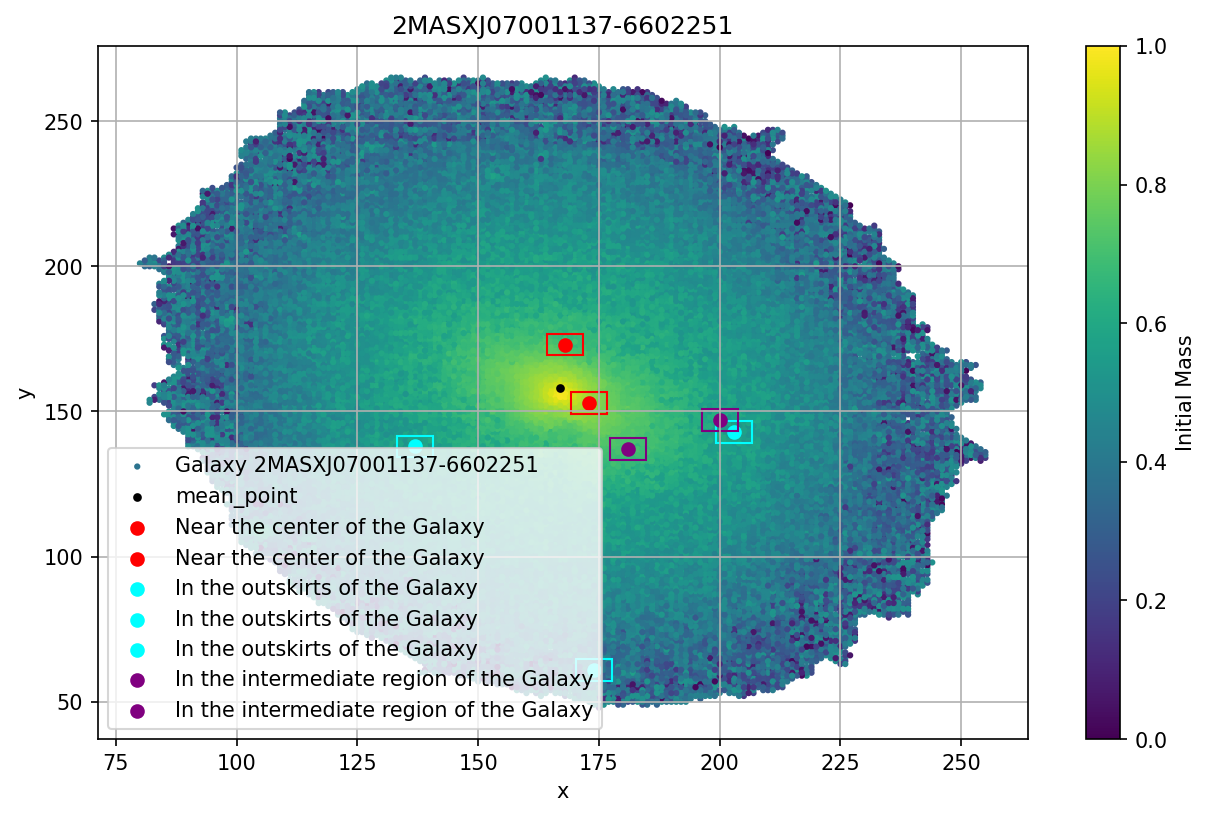

In [13]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Scatter plot of the galaxy
plt.figure(figsize=(10, 6), dpi = 150)
plt.scatter(x, y, label="Galaxy 2MASXJ07001137-6602251", c=mass_ini, cmap='viridis', s=4)
plt.scatter(x_m, y_m, color='black', s=10, label="mean_point")

area_size_i = float(input("Put the desired area size in pixels:"))
area_size = np.sqrt(area_size_i)

#first choice    
user_input1 = input("From where you want to pick a point of the galaxy: center, intermediate or outskirt? ")
points1 = int(input("How many points/area you want to have from here: "))
    
x_value_to_find1 = {}
a1 = {}
b1 = {}
area1 = {}
mask1 = {}
selected_x1 = {}
selected_y1 = {}
selected_area1 = {}

for i in range(points1):
    if user_input1.lower() == 'center':
        while True:
            x_value_to_find1[i] = random.choice(x)
            a1[i] = x_value_to_find1[i]
            b1[i] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find1[i]), None)
            if is_point_inside_circle(a1[i], b1[i], center_x, center_y, radius1):
                area1[i] = take_area_around_point(a1[i], b1[i], center_x, center_y, radius1, area_size)
                print(f"Random point within the circle: (x={a1[i]}, y={b1[i]}), Area around the point: {area1[i]}")

                mask1[i] = (x >= a1[i] - area_size / 2) & (x <= a1[i] + area_size / 2) & (y >= b1[i] - area_size / 2) & (y <= b1[i] + area_size / 2)
                selected_x1[i] = x[mask1[i]]
                selected_y1[i] = y[mask1[i]]

                plt.scatter([a1[i]], [b1[i]], label="Near the center of the Galaxy", color='red')
                selected_area1[i] = patches.Rectangle((a1[i] - area_size/2, b1[i] - area_size/2), area_size, area_size, edgecolor='red', facecolor='none')
                plt.gca().add_patch(selected_area1[i])
                break

    elif user_input1.lower() == 'intermediate':
        while True:
            x_value_to_find1[i] = random.choice(x)
            a1[i] = x_value_to_find1[i]
            b1[i] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find1[i]), None)
            if radius1 ** 2 <= (a1[i] - center_x) ** 2 + (b1[i] - center_y) ** 2 <= radius2 ** 2:
                area1[i] = take_area_around_point(a1[i], b1[i], center_x, center_y, (radius1 + radius2) / 2, area_size)
                print(f"Random point in intermediate region: (x={a1[i]}, y={b1[i]}), Area around the point: {area1[i]}")

                mask1[i] = (x >= a1[i] - area_size / 2) & (x <= a1[i] + area_size / 2) & (y >= b1[i] - area_size / 2) & (y <= b1[i] + area_size / 2)
                selected_x1[i] = x[mask1[i]]
                selected_y1[i] = y[mask1[i]]

                plt.scatter([a1[i]], [b1[i]], label="In the intermediate region of the Galaxy", color='purple')
                selected_area1[i] = patches.Rectangle((a1[i] - area_size/2, b1[i] - area_size/2), area_size, area_size, edgecolor='purple', facecolor='none')
                plt.gca().add_patch(selected_area1[i])
                break

    elif user_input1.lower() == 'outskirt':
        while True:
            x_value_to_find1[i] = random.choice(x)
            a1[i] = x_value_to_find1[i]
            b1[i] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find1[i]), None)
            if not is_point_inside_circle(a1[i], b1[i], center_x, center_y, radius2):
                area1[i] = take_area_around_point(a1[i], b1[i], center_x, center_y, radius2, area_size)
                print(f"Random point outside the circle: (x={a1[i]}, y={b1[i]}), Area around the point: {area1[i]}")

                mask1[i] = (x >= a1[i] - area_size / 2) & (x <= a1[i] + area_size / 2) & (y >= b1[i] - area_size / 2) & (y <= b1[i] + area_size / 2)
                selected_x1[i] = x[mask1[i]]
                selected_y1[i] = y[mask1[i]]

                plt.scatter([a1[i]], [b1[i]], label="In the outskirts of the Galaxy", color='cyan')
                selected_area1[i] = patches.Rectangle((a1[i] - area_size/2, b1[i] - area_size/2), area_size, area_size, edgecolor='cyan', facecolor='none')
                plt.gca().add_patch(selected_area1[i])
                break

    else:
        print("Invalid input. Please enter 'center', 'intermediate' 'outskirt'.")
        
#second choice
user_input2 = input("From where you want to pick a point of the galaxy: center, intermediate or outskirt? ")
points2 = int(input("How many points/area you want to have from here: "))

x_value_to_find2 = {}
a2 = {}
b2 = {}
area2 = {}
mask2 = {}
selected_x2 = {}
selected_y2 = {}
selected_area2 = {}
        
for j in range(points2):
    if user_input2.lower() == 'center':
        while True:
            x_value_to_find2[j] = random.choice(x)
            a2[j] = x_value_to_find2[j]
            b2[j] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find2[j]), None)
            if is_point_inside_circle(a2[j], b2[j], center_x, center_y, radius1):
                area2[j] = take_area_around_point(a2[j], b2[j], center_x, center_y, radius1, area_size)
                print(f"Random point within the circle: (x={a2[j]}, y={b2[j]}), Area around the point: {area2[j]}")

                mask2[j] = (x >= a2[j] - area_size / 2) & (x <= a2[j] + area_size / 2) & (y >= b2[j] - area_size / 2) & (y <= b2[j] + area_size / 2)
                selected_x2[j] = x[mask2[j]]
                selected_y2[j] = y[mask2[j]]

                plt.scatter([a2[j]], [b2[j]], label="Near the center of the Galaxy", color='red')
                selected_area2[j] = patches.Rectangle((a2[j] - area_size/2, b2[j] - area_size/2), area_size, area_size, edgecolor='red', facecolor='none')
                plt.gca().add_patch(selected_area2[j])
                break

    elif user_input2.lower() == 'intermediate':
        while True:
            x_value_to_find2[j] = random.choice(x)
            a2[j] = x_value_to_find2[j]
            b2[j] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find2[j]), None)
            if radius1 ** 2 <= (a2[j] - center_x) ** 2 + (b2[j] - center_y) ** 2 <= radius2 ** 2:
                area2[j] = take_area_around_point(a2[j], b2[j], center_x, center_y, (radius1 + radius2) / 2, area_size)
                print(f"Random point in intermediate region: (x={a2[j]}, y={b2[j]}), Area around the point: {area2[j]}")

                mask2[j] = (x >= a2[j] - area_size / 2) & (x <= a2[j] + area_size / 2) & (y >= b2[j] - area_size / 2) & (y <= b2[j] + area_size / 2)
                selected_x2[j] = x[mask2[j]]
                selected_y2[j] = y[mask2[j]]

                plt.scatter([a2[j]], [b2[j]], label="In the intermediate region of the Galaxy", color='purple')
                selected_area2[j] = patches.Rectangle((a2[j] - area_size/2, b2[j] - area_size/2), area_size, area_size, edgecolor='purple', facecolor='none')
                plt.gca().add_patch(selected_area2[j])
                break

    elif user_input2.lower() == 'outskirt':
        while True:
            x_value_to_find2[j] = random.choice(x)
            a2[j] = x_value_to_find2[j]
            b2[j] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find2[j]), None)
            if not is_point_inside_circle(a2[j], b2[j], center_x, center_y, radius2):
                area2[j] = take_area_around_point(a2[j], b2[j], center_x, center_y, radius2, area_size)
                print(f"Random point outside the circle: (x={a2[j]}, y={b2[j]}), Area around the point: {area2[j]}")

                mask2[j] = (x >= a2[j] - area_size / 2) & (x <= a2[j] + area_size / 2) & (y >= b2[j] - area_size / 2) & (y <= b2[j] + area_size / 2)
                selected_x2[j] = x[mask2[j]]
                selected_y2[j] = y[mask2[j]]

                plt.scatter([a2[j]], [b2[j]], label="In the outskirts of the Galaxy", color='cyan')
                selected_area2[j] = patches.Rectangle((a2[j] - area_size/2, b2[j] - area_size/2), area_size, area_size, edgecolor='cyan', facecolor='none')
                plt.gca().add_patch(selected_area2[j])
                break

    else:
        print("Invalid input. Please enter 'center', 'intermediate' 'outskirt'.")
        

#third choice
user_input3 = input("From where you want to pick a point of the galaxy: center, intermediate or outskirt? ")
points3 = int(input("How many points/area you want to have from here: "))

x_value_to_find3 = {}
a3 = {}
b3 = {}
area3 = {}
mask3 = {}
selected_x3 = {}
selected_y3 = {}
selected_area3 = {}

for k in range(points3):
    if user_input3.lower() == 'center':
        while True:
            x_value_to_find3[k] = random.choice(x)
            a3[k] = x_value_to_find3[k]
            b3[k] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find3[k]), None)
            if is_point_inside_circle(a3[k], b3[k], center_x, center_y, radius1):
                area3[k] = take_area_around_point(a3[k], b3[k], center_x, center_y, radius1, area_size)
                print(f"Random point within the circle: (x={a3[k]}, y={b3[k]}), Area around the point: {area3[k]}")

                mask3[k] = (x >= a3[k] - area_size / 2) & (x <= a3[k] + area_size / 2) & (y >= b3[k] - area_size / 2) & (y <= b3[k] + area_size / 2)
                selected_x3[k] = x[mask3[k]]
                selected_y3[k] = y[mask3[k]]

                plt.scatter([a3[k]], [b3[k]], label="Near the center of the Galaxy", color='red')
                selected_area3[k] = patches.Rectangle((a3[k] - area_size/2, b3[k] - area_size/2), area_size, area_size, edgecolor='red', facecolor='none')
                plt.gca().add_patch(selected_area3[k])
                break

    elif user_input3.lower() == 'intermediate':
        while True:
            x_value_to_find3[k] = random.choice(x)
            a3[k] = x_value_to_find3[k]
            b3[k] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find3[k]), None)
            if radius1 ** 2 <= (a3[k] - center_x) ** 2 + (b3[k] - center_y) ** 2 <= radius2 ** 2:
                area3[k] = take_area_around_point(a3[k], b3[k], center_x, center_y, (radius1 + radius2) / 2, area_size)
                print(f"Random point in intermediate region: (x={a3[k]}, y={b3[k]}), Area around the point: {area3[k]}")

                mask3[k] = (x >= a3[k] - area_size / 2) & (x <= a3[k] + area_size / 2) & (y >= b3[k] - area_size / 2) & (y <= b3[k] + area_size / 2)
                selected_x3[k] = x[mask3[k]]
                selected_y3[k] = y[mask3[k]]

                plt.scatter([a3[k]], [b3[k]], label="In the intermediate region of the Galaxy", color='purple')
                selected_area3[k] = patches.Rectangle((a3[k] - area_size/2, b3[k] - area_size/2), area_size, area_size, edgecolor='purple', facecolor='none')
                plt.gca().add_patch(selected_area3[k])
                break

    elif user_input3.lower() == 'outskirt':
        while True:
            x_value_to_find3[k] = random.choice(x)
            a3[k] = x_value_to_find3[k]
            b3[k] = next((y_value for x_value, y_value in zip(x, y) if x_value == x_value_to_find3[k]), None)
            if not is_point_inside_circle(a3[k], b3[k], center_x, center_y, radius2):
                area3[k] = take_area_around_point(a3[k], b3[k], center_x, center_y, radius2, area_size)
                print(f"Random point outside the circle: (x={a3[k]}, y={b3[k]}), Area around the point: {area3[k]}")

                mask3[k] = (x >= a3[k] - area_size / 2) & (x <= a3[k] + area_size / 2) & (y >= b3[k] - area_size / 2) & (y <= b3[k] + area_size / 2)
                selected_x3[k] = x[mask3[k]]
                selected_y3[k] = y[mask3[k]]

                plt.scatter([a3[k]], [b3[k]], label="In the outskirts of the Galaxy", color='cyan')
                selected_area3[k] = patches.Rectangle((a3[k] - area_size/2, b3[k] - area_size/2), area_size, area_size, edgecolor='cyan', facecolor='none')
                plt.gca().add_patch(selected_area3[k])
                break

    else:
        print("Invalid input. Please enter 'center', 'intermediate' 'outskirt'.")


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("2MASXJ07001137-6602251")
plt.colorbar(label='Initial Mass')
plt.grid(True)
plt.show()

In [20]:
# Initialize empty lists for each property
Mass_ini1 = []
Mass_cor1 = []
SFR_10Myr1 = []
SFR_100Myr1 = []
Age_LightWeighted1 = []
Age_MassWeighted1 = []
Metallicity_LightWeighted1 = []
Metallicity_MassWeighted1 = []
A_V1 = []

# Assuming mask1 is a list of masks (e.g., [mask1, mask2, mask3])
for i in range(points1): 
    selected_mass_ini = mass_ini[mask1[i]]
    selected_met_massw = met_massw[mask1[i]]
    selected_mass_cor = mass_cor[mask1[i]]
    selected_sfr_10myr = sfr_10myr[mask1[i]]
    selected_sfr_100myr = sfr_100myr[mask1[i]]
    selected_age_lightw = age_lightw[mask1[i]]
    selected_age_massw = age_massw[mask1[i]]
    selected_met_lightw = met_lightw[mask1[i]]
    selected_A_V = A_V[mask1[i]]

    # Append the selected values to the corresponding lists
    Mass_ini1.append(selected_mass_ini)
    Mass_cor1.append(selected_mass_cor)
    SFR_10Myr1.append(selected_sfr_10myr)
    SFR_100Myr1.append(selected_sfr_100myr)
    Age_LightWeighted1.append(selected_age_lightw)
    Age_MassWeighted1.append(selected_age_massw)
    Metallicity_LightWeighted1.append(selected_met_lightw)
    Metallicity_MassWeighted1.append(selected_met_massw)
    A_V1.append(selected_A_V)

# Now we have individual lists for each property corresponding to each mask1[i].
# For example:
# For mask1[0]:
# Mass_ini1[0], Mass_cor1[0], SFR_10Myr1[0], SFR_100Myr1[0], Age_LightWeighted1[0], 
# Age_MassWeighted1[0], Metallicity_LightWeighted1[0], Metallicity_MassWeighted1[0], A_V1[0]

# For mask1[1]:
# Mass_ini1[1], Mass_cor1[1], SFR_10Myr1[1], SFR_100Myr1[1], Age_LightWeighted1[1], 
# Age_MassWeighted1[1], Metallicity_LightWeighted1[1], Metallicity_MassWeighted1[1], A_V1[1]


In [55]:
# Initialize empty lists for each property
Mass_ini2 = []
Mass_cor2 = []
SFR_10Myr2 = []
SFR_100Myr2 = []
Age_LightWeighted2 = []
Age_MassWeighted2 = []
Metallicity_LightWeighted2 = []
Metallicity_MassWeighted2 = []
A_V2 = []

# Assuming mask2 is a list of masks (e.g., [mask1, mask2, mask3])
for i in range(points2): 
    selected_mass_ini = mass_ini[mask2[i]]
    selected_met_massw = met_massw[mask2[i]]
    selected_mass_cor = mass_cor[mask2[i]]
    selected_sfr_10myr = sfr_10myr[mask2[i]]
    selected_sfr_100myr = sfr_100myr[mask2[i]]
    selected_age_lightw = age_lightw[mask2[i]]
    selected_age_massw = age_massw[mask2[i]]
    selected_met_lightw = met_lightw[mask2[i]]
    selected_A_V = A_V[mask2[i]]

    # Append the selected values to the corresponding lists
    Mass_ini2.append(selected_mass_ini)
    Mass_cor2.append(selected_mass_cor)
    SFR_10Myr2.append(selected_sfr_10myr)
    SFR_100Myr2.append(selected_sfr_100myr)
    Age_LightWeighted2.append(selected_age_lightw)
    Age_MassWeighted2.append(selected_age_massw)
    Metallicity_LightWeighted2.append(selected_met_lightw)
    Metallicity_MassWeighted2.append(selected_met_massw)
    A_V2.append(selected_A_V)


In [56]:
# Initialize empty lists for each property
Mass_ini3 = []
Mass_cor3 = []
SFR_10Myr3 = []
SFR_100Myr3 = []
Age_LightWeighted3 = []
Age_MassWeighted3 = []
Metallicity_LightWeighted3 = []
Metallicity_MassWeighted3 = []
A_V3 = []

# Assuming mask3 is a list of masks (e.g., [mask1, mask2, mask3])
for i in range(points3): 
    selected_mass_ini = mass_ini[mask3[i]]
    selected_met_massw = met_massw[mask3[i]]
    selected_mass_cor = mass_cor[mask3[i]]
    selected_sfr_10myr = sfr_10myr[mask3[i]]
    selected_sfr_100myr = sfr_100myr[mask3[i]]
    selected_age_lightw = age_lightw[mask3[i]]
    selected_age_massw = age_massw[mask3[i]]
    selected_met_lightw = met_lightw[mask3[i]]
    selected_A_V = A_V[mask3[i]]

    # Append the selected values to the corresponding lists
    Mass_ini3.append(selected_mass_ini)
    Mass_cor3.append(selected_mass_cor)
    SFR_10Myr3.append(selected_sfr_10myr)
    SFR_100Myr3.append(selected_sfr_100myr)
    Age_LightWeighted3.append(selected_age_lightw)
    Age_MassWeighted3.append(selected_age_massw)
    Metallicity_LightWeighted3.append(selected_met_lightw)
    Metallicity_MassWeighted3.append(selected_met_massw)
    A_V3.append(selected_A_V)


In [47]:
# for i in range(points1):
#     property_list[i] = [Mass_ini1[i], Mass_cor1[i], SFR_10Myr1[i], SFR_100Myr1[i], 
#                  Age_LightWeighted1[i], Age_MassWeighted1[i], 
#                  Metallicity_LightWeighted1[i], Metallicity_MassWeighted1[i], A_V1[i]]

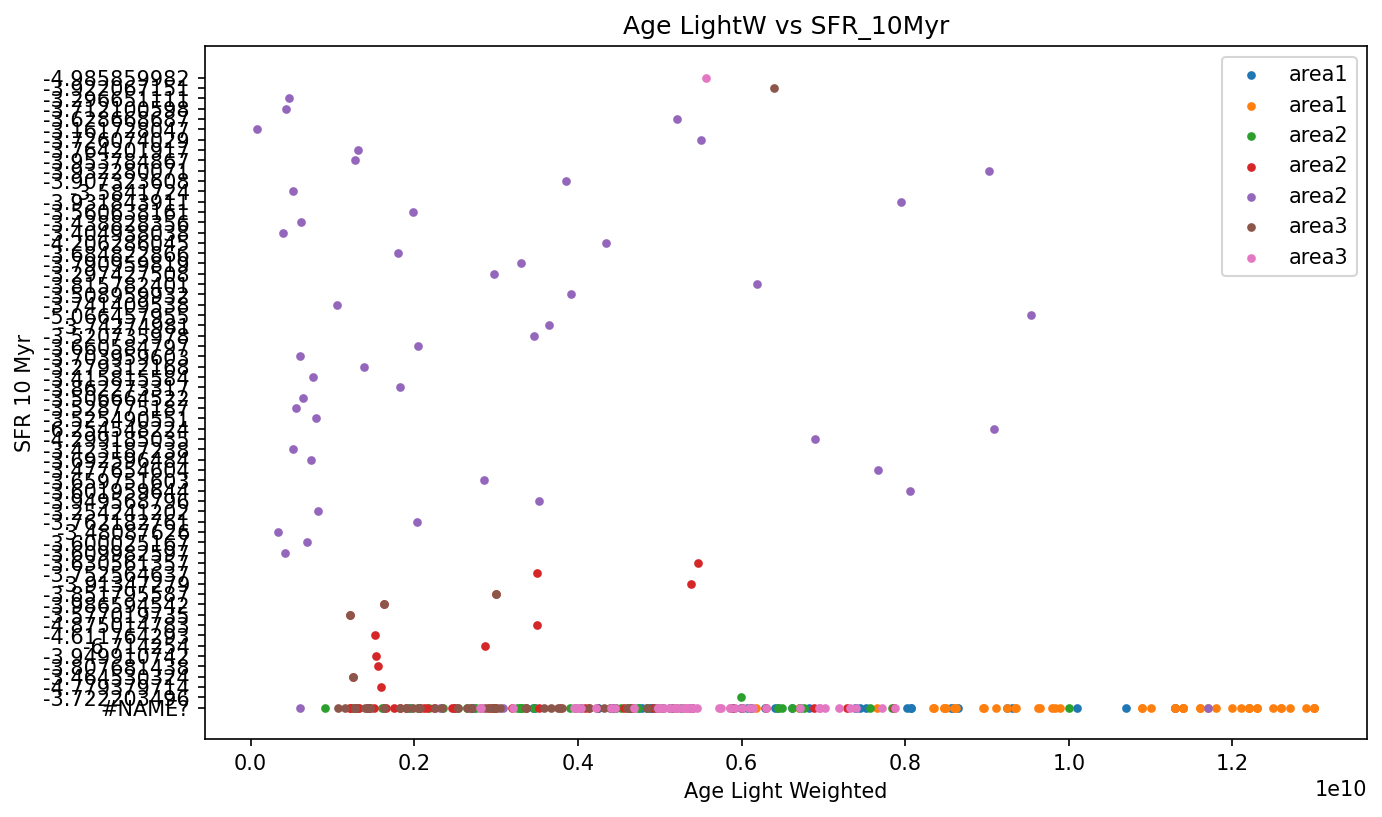

In [66]:
plt.figure(figsize=(10, 6), dpi=150)
for i in range(points1):
    plt.scatter(Age_LightWeighted1[i], SFR_10Myr1[i], s=10, label='area1')
for j in range(points2):
    plt.scatter(Age_LightWeighted2[j], SFR_10Myr2[j], s=10, label='area2')
for k in range(points3):
    plt.scatter(Age_LightWeighted3[k], SFR_10Myr3[k], s=10, label='area3')

#plt.scatter(g_age_lightw, g_sfr_10myr, s=20, label='Global Data')  # Fix 's' parameter here
plt.xlabel('Age Light Weighted')
plt.ylabel('SFR 10 Myr')
plt.legend()
plt.title("Age LightW vs SFR_10Myr")
plt.show()
